In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("bank_train.csv")

In [109]:
df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no


In [110]:
df.isna().sum()

id               0
age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

In [111]:
df.duplicated(keep='first').sum()

0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         40000 non-null  int64  
 1   age        38801 non-null  float64
 2   job        38651 non-null  object 
 3   marital    39903 non-null  object 
 4   education  40000 non-null  object 
 5   location   18498 non-null  object 
 6   default    40000 non-null  object 
 7   balance    38208 non-null  float64
 8   housing    40000 non-null  object 
 9   loan       40000 non-null  object 
 10  contact    39266 non-null  object 
 11  day        40000 non-null  int64  
 12  month      40000 non-null  object 
 13  duration   40000 non-null  int64  
 14  campaign   38603 non-null  float64
 15  pdays      40000 non-null  int64  
 16  previous   39703 non-null  float64
 17  poutcome   40000 non-null  object 
 18  y          40000 non-null  object 
dtypes: float64(4), int64(4), object(11)
memory usa

In [113]:
df.describe().round(2)


,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00,38801.00,38208.00,40000.00,40000.00,38603.00,40000.00,39703.00
mean,19999.50,40.96,1364.65,15.82,380.42,2.75,40.36,0.58
std,11547.15,11.03,3059.02,8.33,3044.41,3.04,100.29,2.34
min,0.00,8.00,-8019.00,1.00,-20.00,1.00,-1.00,0.00
25%,9999.75,33.00,73.00,8.00,102.00,1.00,-1.00,0.00
50%,19999.50,39.00,450.50,16.00,180.00,2.00,-1.00,0.00
75%,29999.25,48.00,1423.00,21.00,320.00,3.00,-1.00,0.00
max,39999.00,150.00,102127.00,31.00,75000.00,58.00,871.00,275.00


In [114]:
df.describe(include=['object'])

,job,marital,education,location,default,housing,loan,contact,month,poutcome,y
count,38651,39903,40000,18498,40000,40000,40000,39266,40000,40000,40000
unique,13,3,4,6,2,2,4,3,12,4,2
top,blue-collar,married,secondary,Lisboa,no,yes,no,cellular,may,unknown,no
freq,8313,24009,20563,9261,39268,22213,23551,25447,12200,32662,35322


In [115]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

for col in categoricas:
  print(col)
  print(df[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] 

marital
['single' 'married' 'divorced' nan] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

location
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] 

default
['no' 'yes'] 

housing
['no' 'yes'] 

loan
['no' 'n' 'y' 'yes'] 

contact
['cellular' 'unknown' nan 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

poutcome
['unknown' 'other' 'failure' 'success'] 

y
['no' 'yes'] 



In [116]:
df_clean = df.copy()

In [117]:
df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no


In [118]:
df_clean['y'] = df['y'].replace({"yes": 1, "no": 0})
df_clean['loan'] = df['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
df_clean['default'] = df['default'].replace({'no': 0, 'yes':1})
df_clean['housing'] = df['housing'].replace({'no': 0, 'yes':1})


C:\Users\André DIas\AppData\Local\Temp\ipykernel_13560\3586671744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['y'] = df['y'].replace({"yes": 1, "no": 0})
C:\Users\André DIas\AppData\Local\Temp\ipykernel_13560\3586671744.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['loan'] = df['loan'].replace({'no': 0, 'n': 0, 'y':1, 'yes':1})
C:\Users\André DIas\AppData\Local\Temp\ipykernel_13560\3586671744.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version

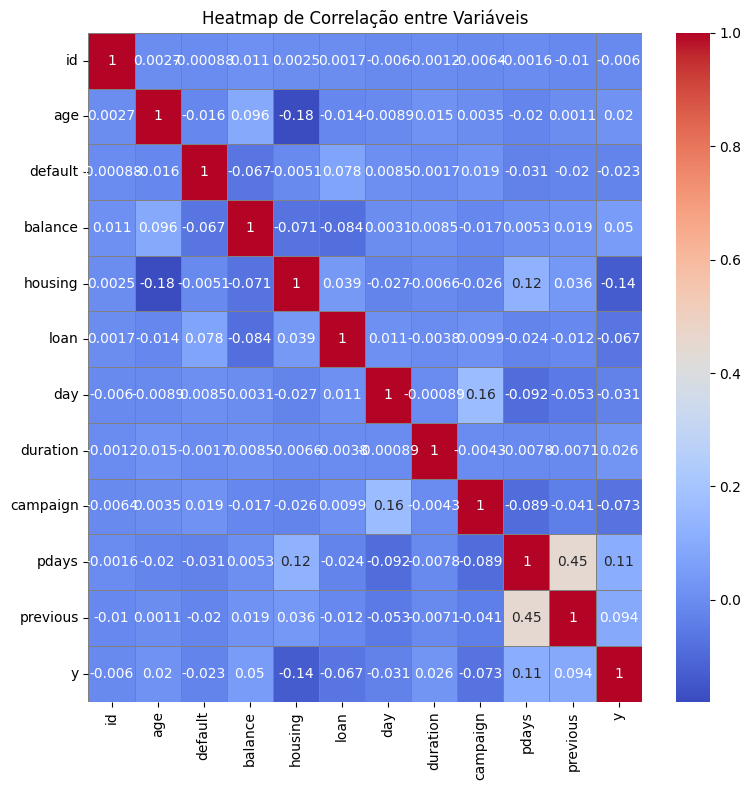

In [119]:
numericas = df_clean.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numericas.corr()

# Plotando o heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Heatmap de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

C:\Users\André DIas\AppData\Local\Temp\ipykernel_13560\216678881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_mes.index, y=mean_sucesso_mes.values, palette='Set2', order = ['jan', 'feb','mar', 'apr', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])


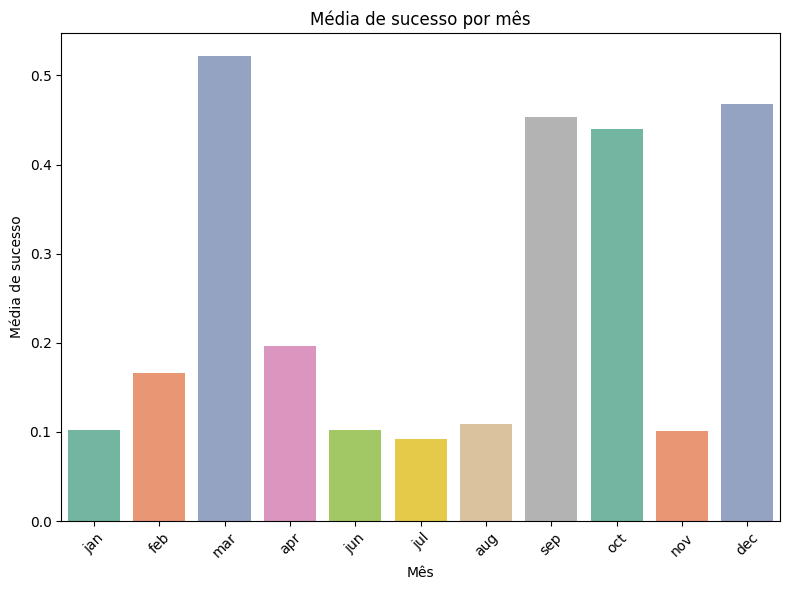

In [120]:
mean_sucesso_mes = df_clean.groupby('month')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_mes = mean_sucesso_mes.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_mes.index, y=mean_sucesso_mes.values, palette='Set2', order = ['jan', 'feb','mar', 'apr', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Média de sucesso por mês')
plt.xlabel('Mês')
plt.ylabel('Média de sucesso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\André DIas\AppData\Local\Temp\ipykernel_13560\3166765158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_trabalho.index, y=mean_sucesso_trabalho, palette='Set2',)


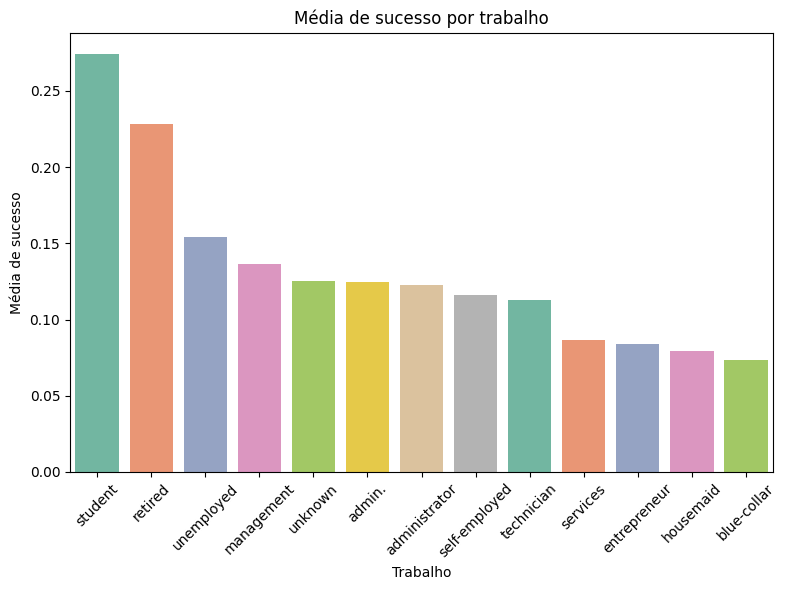

In [121]:
mean_sucesso_trabalho = df_clean.groupby('job')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_trabalho = mean_sucesso_trabalho.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_trabalho.index, y=mean_sucesso_trabalho, palette='Set2',)
plt.title('Média de sucesso por trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Média de sucesso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [122]:
ocorrencias = df['job'].value_counts().get('unknown', 0)
print(ocorrencias)
# dropar esses 239

239


C:\Users\André DIas\AppData\Local\Temp\ipykernel_13560\3127832969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_sucesso_educacao.index, y=mean_sucesso_educacao, palette='Set2',)


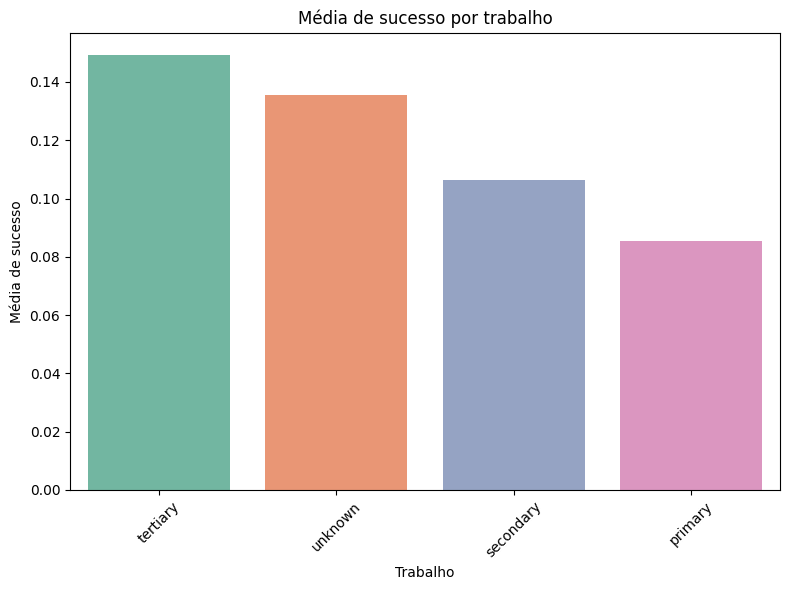

In [123]:
mean_sucesso_educacao = df_clean.groupby('education')['y'].mean()

# Ordenando os níveis de educação pela média de promoção
mean_sucesso_educacao = mean_sucesso_educacao.sort_values(ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_sucesso_educacao.index, y=mean_sucesso_educacao, palette='Set2',)
plt.title('Média de sucesso por trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Média de sucesso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#1600 educacao - dropar

In [124]:
df_clean = df_clean.drop(columns=['location'])

In [125]:
df_clean.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,0,4522.0,0,0,cellular,28,aug,55,1.0,-1,0.0,unknown,0
1,1,42.0,blue-collar,married,primary,1,398.0,1,0,unknown,16,may,251,4.0,-1,0.0,unknown,0
2,2,26.0,student,single,secondary,0,706.0,0,0,unknown,8,oct,118,1.0,105,2.0,other,0
3,3,54.0,management,married,tertiary,0,0.0,0,1,cellular,19,nov,307,3.0,-1,0.0,unknown,0
4,4,43.0,self-employed,married,secondary,0,918.0,1,0,unknown,6,may,193,1.0,-1,0.0,unknown,0
5,5,34.0,technician,single,secondary,0,52.0,0,0,cellular,19,aug,90,4.0,-1,0.0,unknown,0
6,6,40.0,management,married,tertiary,0,143.0,0,0,cellular,13,aug,832,6.0,-1,0.0,unknown,0
7,7,41.0,blue-collar,divorced,secondary,0,NaN,1,0,cellular,31,jul,228,4.0,-1,0.0,unknown,0
8,8,45.0,blue-collar,married,primary,0,1794.0,1,0,unknown,14,may,174,2.0,-1,0.0,unknown,0
9,9,51.0,management,single,secondary,0,NaN,1,0,unknown,16,jun,1248,NaN,-1,0.0,unknown,1


In [126]:
df_clean = df_clean.drop(columns=['poutcome'])

#32000 unknow

In [127]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Aplicar o mapeamento à coluna 'month'
df_clean['month'] = df['month'].map(month_mapping)
df_clean.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,0,41.0,management,single,tertiary,0,4522.0,0,0,cellular,28,8,55,1.0,-1,0.0,0
1,1,42.0,blue-collar,married,primary,1,398.0,1,0,unknown,16,5,251,4.0,-1,0.0,0
2,2,26.0,student,single,secondary,0,706.0,0,0,unknown,8,10,118,1.0,105,2.0,0
3,3,54.0,management,married,tertiary,0,0.0,0,1,cellular,19,11,307,3.0,-1,0.0,0
4,4,43.0,self-employed,married,secondary,0,918.0,1,0,unknown,6,5,193,1.0,-1,0.0,0


In [128]:
df_clean = df_clean.drop(columns=['id'])

#dropar pq n tem significado


In [129]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,management,single,tertiary,0,4522.0,0,0,cellular,28,8,55,1.0,-1,0.0,0
1,42.0,blue-collar,married,primary,1,398.0,1,0,unknown,16,5,251,4.0,-1,0.0,0
2,26.0,student,single,secondary,0,706.0,0,0,unknown,8,10,118,1.0,105,2.0,0
3,54.0,management,married,tertiary,0,0.0,0,1,cellular,19,11,307,3.0,-1,0.0,0
4,43.0,self-employed,married,secondary,0,918.0,1,0,unknown,6,5,193,1.0,-1,0.0,0


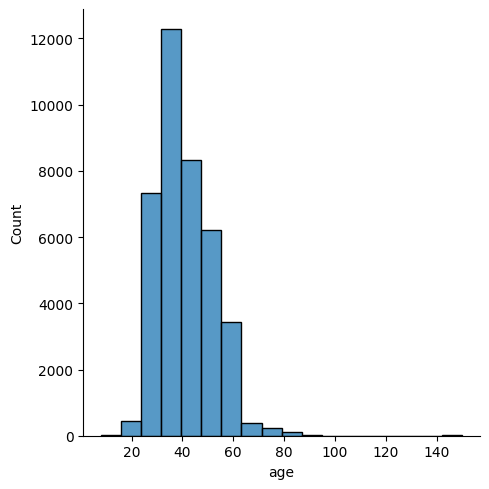

In [130]:
sns.displot(df_clean['age'], bins=18)

#tirar o superhumano

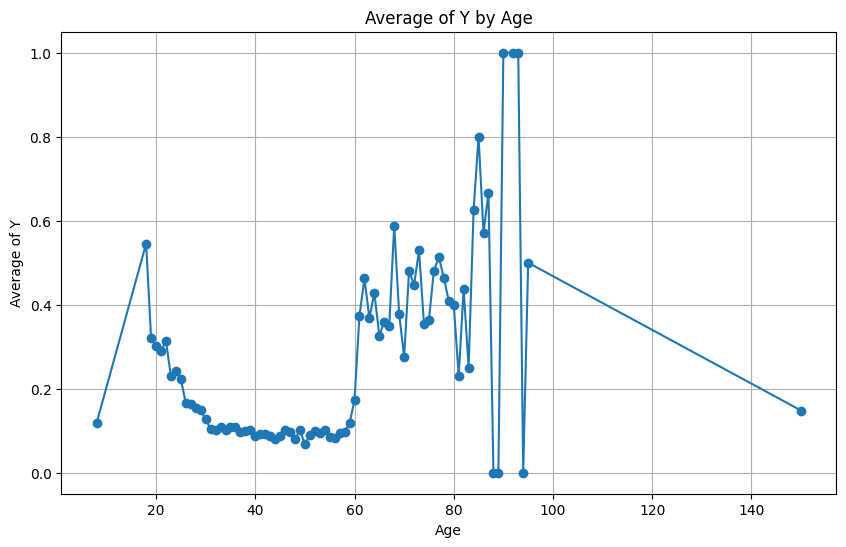

In [131]:

# Agrupar por 'age' e calcular a média de 'y'
age_mean_y = df_clean.groupby('age')['y'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(age_mean_y['age'], age_mean_y['y'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average of Y')
plt.title('Average of Y by Age')
plt.grid(True)
plt.show()

In [132]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,41.0,management,single,tertiary,0,4522.0,0,0,cellular,28,8,55,1.0,-1,0.0,0
1,42.0,blue-collar,married,primary,1,398.0,1,0,unknown,16,5,251,4.0,-1,0.0,0
2,26.0,student,single,secondary,0,706.0,0,0,unknown,8,10,118,1.0,105,2.0,0
3,54.0,management,married,tertiary,0,0.0,0,1,cellular,19,11,307,3.0,-1,0.0,0
4,43.0,self-employed,married,secondary,0,918.0,1,0,unknown,6,5,193,1.0,-1,0.0,0


In [133]:
age_count = df.groupby('age').size().reset_index(name='count')

print(age_count)


      age  count
0     8.0     17
1    18.0     11
2    19.0     28
3    20.0     43
4    21.0     69
..    ...    ...
74   92.0      2
75   93.0      2
76   94.0      1
77   95.0      2
78  150.0     27

[79 rows x 2 columns]


In [134]:
df_clean = df_clean[(df_clean['age'] <= 80) & (df_clean['age'] > 8)]


age_count = df_clean.groupby('age').size().reset_index(name='count')

print(age_count)


     age  count
0   18.0     11
1   19.0     28
2   20.0     43
3   21.0     69
4   22.0    118
..   ...    ...
58  76.0     27
59  77.0     37
60  78.0     28
61  79.0     22
62  80.0     30

[63 rows x 2 columns]


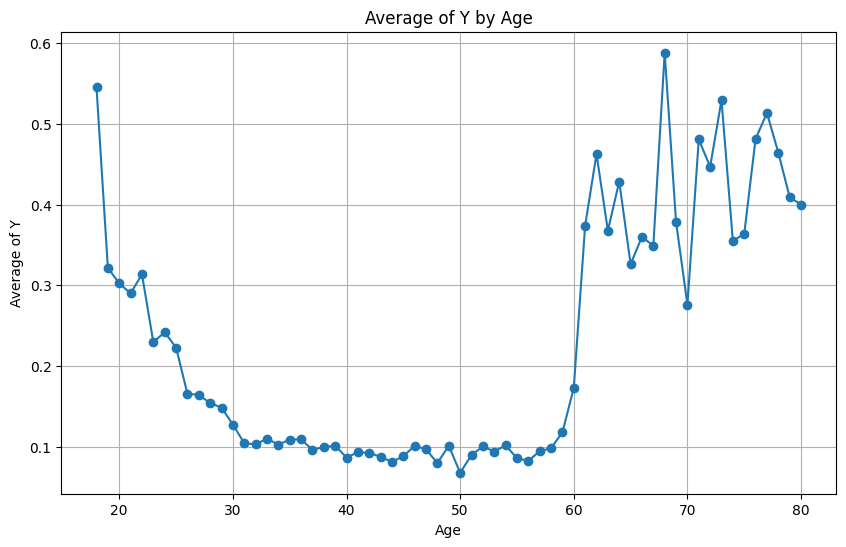

In [135]:

# Agrupar por 'age' e calcular a média de 'y'
age_mean_y = df_clean.groupby('age')['y'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(age_mean_y['age'], age_mean_y['y'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average of Y')
plt.title('Average of Y by Age')
plt.grid(True)
plt.show()

# separar em faixas até 30, 30-60, 60+